# Cuisine dataset
---
#### Name: 劉耀文 (Yao-Wen Liu)
#### Student ID: 0716236
---

## 1. Data Input
### Import libraries and read dataset from file
* Use read_json() in Pandas to read the training dataset from file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

training_set = pd.read_json('train.json')
training_set

,id,cuisine,ingredients
0,42302,southern_us,"[egg whites, pecans, agave nectar, ground cinn..."
1,43202,greek,"[large egg whites, whole milk, bread crumb fre..."
2,31619,cajun_creole,"[sugar, vegetable oil, yeast, eggs, evaporated..."
3,30920,korean,"[honey, rice vinegar, brown sugar, ginger, gar..."
4,46567,italian,"[mushroom caps, asiago, large shrimp, fat free..."
...,...,...,...
29769,24516,greek,"[mayonaise, mahimahi fillet, tomatoes, extra-v..."
29770,49253,mexican,"[neutral oil, ground black pepper, tomatillos,..."
29771,4861,french,"[tomatoes, chopped fresh thyme, fresh mushroom..."
29772,529,mexican,"[unsalted butter, chees fresco queso, lime, ch..."


## 2. Data Visualization
### Plot the data distribution by value count of their labels (targets).
* Use np.unique() to find all possible events of each feature and count, then draw them out with plt.bar().

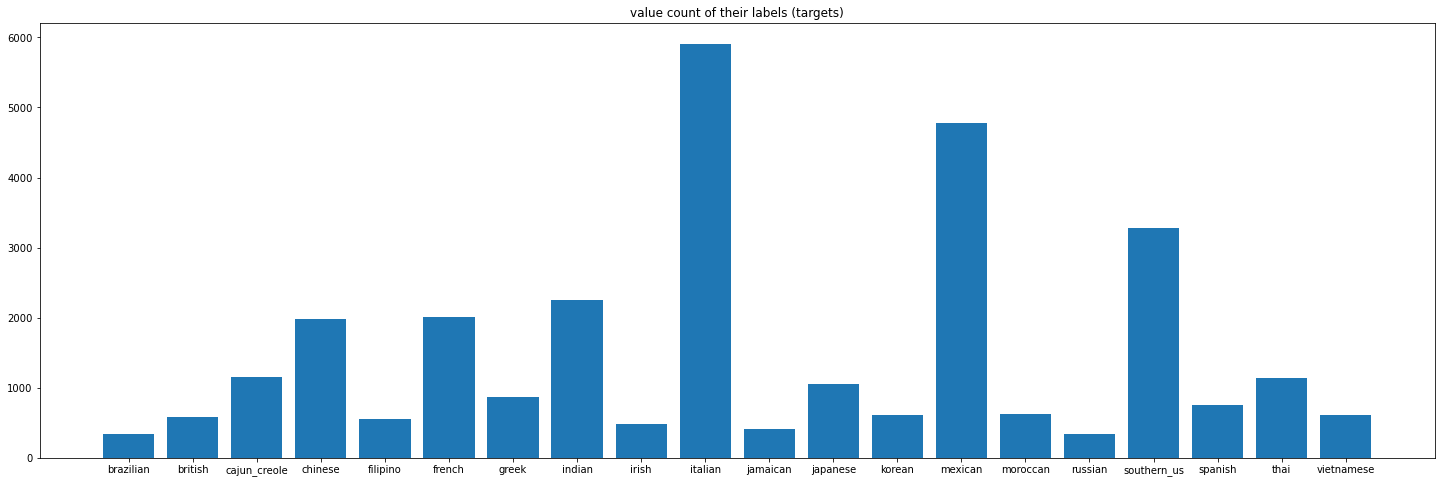

In [2]:
plt.figure(figsize=(25, 8))
labels, index=np.unique(training_set['cuisine'], return_index=True)
counts=[]
for j in range(0,len(labels)):
    counts.append(training_set['cuisine'].tolist().count(labels[j]))
plt.bar(labels, counts)
plt.title('value count of their labels (targets)')
plt.show()

### Plot the data distribution by value count of top 30 features.
* Count the number of each ingredient was used.
* Use Sorted() to sort the dict, then find the top 30 ingredients.
* Draw them out with plt.bar().

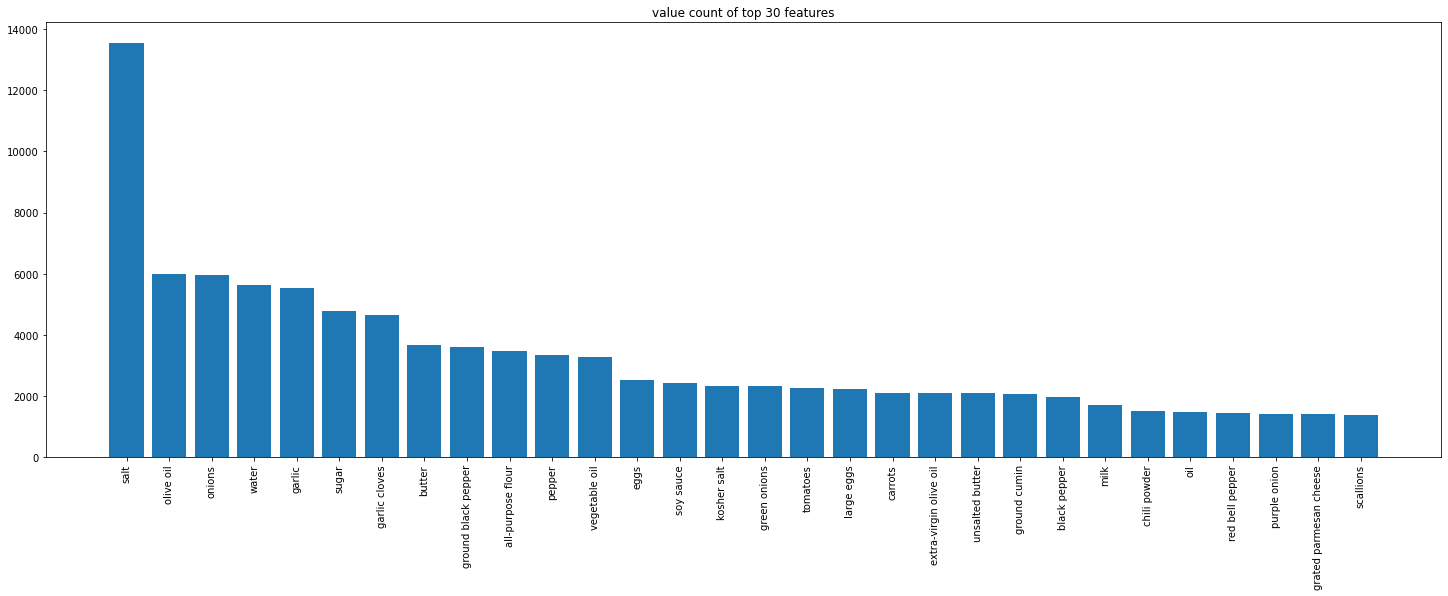

In [3]:
ingredients = {}
for i in range(len(training_set)):
    for j in training_set['ingredients'][i]:
        if j not in ingredients:
            ingredients[j]=1
        else:
            ingredients[j]+=1

ingredients = dict(sorted(ingredients.items(), key=lambda x:x[1], reverse=True))

sorted_ingredients = {}
index = 0
for key in ingredients:
    if (index>=30):
        break
    sorted_ingredients[key] = ingredients[key]
    index += 1

plt.figure(figsize=(25, 8))
plt.bar(range(len(sorted_ingredients)), list(sorted_ingredients.values()), align='center')
plt.xticks(range(len(sorted_ingredients)), list(sorted_ingredients.keys()), rotation=90)
plt.title('value count of top 30 features')
plt.show()

### Plot the data distribution by value count of the number of ingredients.
* Count the number of ingredients used in each cuisine.
* Use np.unique() to find all possible events of each feature and count, then draw them out with plt.bar().

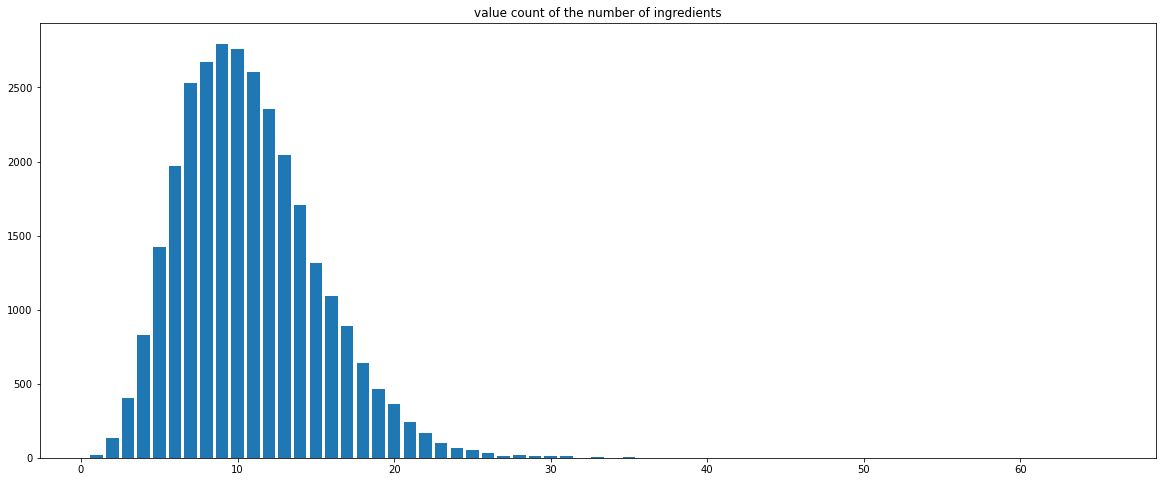

In [4]:
ingredient_count = []
for i in range(len(training_set)):
    ingredient_count.append(len(training_set['ingredients'][i]))

plt.figure(figsize=(20, 8))
labels, index=np.unique(ingredient_count, return_index=True)
counts=[]
for j in range(0,len(labels)):
    counts.append(ingredient_count.count(labels[j]))
plt.bar(labels, counts)
plt.title('value count of the number of ingredients')
plt.show()

## 3. Data Preprocessing
### Transform data format and shape so your model can process them.
* Generate a new pd Dataframe to store the ingredients used for each cuisine in one-hot encoding form.
* Use LabelEncoder() in scikit-learn to encode the label of the dataset to fit the model's input.

In [5]:
# Generate a new pd Dataframe and append the label.
training = pd.DataFrame(0, index=range(len(training_set)), columns=ingredients.keys())
training['label']=training_set['cuisine'].values

# If the current cuisine use the ingredients, then mark it to '1'.
for i in range(len(training_set)):
    for key in training_set['ingredients'][i]:
        training.at[i, key] = 1

# encode the lavel
labelencoder=LabelEncoder()
training['label'] = labelencoder.fit_transform(training['label'])    

print(training.shape)
training

(29774, 6214)


,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,...,low-fat canned coconut milk,Bartlett Pear,meat fats,brown rice penne,belacan,digestive biscuit,carnation condensed milk,legumes,Classico Pasta Sauce,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,12
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
29770,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,13
29771,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
29772,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


### Shuffle the data.
* Use Dataframe.sample(frac=1) in Pandas to shuffle the data.

In [6]:
processed_data = training.sample(frac=1).reset_index(drop=True)
processed_data

,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,...,low-fat canned coconut milk,Bartlett Pear,meat fats,brown rice penne,belacan,digestive biscuit,carnation condensed milk,legumes,Classico Pasta Sauce,label
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,12
2,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
29770,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29771,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
29772,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


## 4. Artificial Neural Networks
### Validation Method - Holdout validation with the ratio 7:3
* Use train_test_split() in scikit-learn to split the dataset into two parts, one for training, one for validation.
* Use keras.utils.to_categorical() in tensorflow to encode the label as one-hot encoding form to meet the requirement of model.

In [7]:
X = processed_data.drop(['label'], axis=1).values.astype(float)
Y = processed_data['label'].values
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=20)

### Model building
* 我看網路上資料說CNN主要用來訓練圖像相關資料、RNN則是跟時間推進有關係，所以就用簡單最基本的神經網路來做作業。
    * 我不確定到底要用什麼參數，所以就把建model的步驟寫成function之後再試試看每層的unit跟optimizer組合
* model building:
    * Reference: https://keras.io/zh/getting-started/sequential-model-guide/
* Hidden layer: 有找到一般資料最多兩層就夠了的資料，所以這邊就只做兩層。
    * Reference: https://www.heatonresearch.com/2017/06/01/hidden-layers.html
* optimizer: 第二個reference有寫到 "Adam combines the good properties of Adadelta and RMSprop and hence tend to do better for most of the problems."，又看到有另一個東西叫做'Adamax'，所以就這兩個去比較。
    * 有試過'SGD'但全部都猜一樣的，所以直接不用。
    * Reference: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    * Reference: https://datascience.stackexchange.com/questions/10523/guidelines-for-selecting-an-optimizer-for-training-neural-networks

#### Model building function for different optimizer
* Use keras.models.Sequential() in tensorflow as the framework of ANN model.
    * loss function用'categorical_crossentropy'是因為這是個分類問題。
* Use keras.layers.Dense() in tensorflow as the layers of ANN model.
    * 用ReLu是因為這個最直觀也比較了解，沒有特別的原因。
* Use keras.layers.Dropout() in tensorflow as the dropout rate of every hidden layer.
    * 用0.5是因為上課講義說大部分情況都是設0.5

In [8]:
def model_building(unit, optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(unit, input_dim=6213, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(unit, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(20, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#### 用Grid search的方式訓練每種參數組合的模型
##### 將validation的結果丟進predicts這個list裡面以利後續result的呈現

In [9]:
predicts = []
units = []
optimizers = []
for unit in [128,256,512,1024]:
    for optimizer in ['Adam', 'Adamax']:
        model=model_building(unit, optimizer)
        model.fit(x_train, y_train, epochs=20, batch_size=512, verbose=0)
        y_predict = model.predict(x_test)
        predicts.append(y_predict)
        units.append(unit)
        optimizers.append(optimizer)

## 6. Results
* Use confusion_matrix(), accuracy_score(), recall_score() and precision_score() to evaluate the performance of the model.
    * Call precision_score() directly might cause some problem, so I use ps() to call it when I import the library.
* Use ConfusionMatrixDisplay() in scikit-learn to plot the confusion matrix of validation result for each model.
* Use plt.subplots() in matplotlib to combine all the figures as one big figure.

(Units, Optimizer): (128,Adam)
Accuracy: 77.57%
Recall: [58.   42.77 67.14 86.92 61.68 64.62 69.26 88.64 44.29 87.12 68.33 70.7
 71.81 90.55 74.6  34.74 79.33 41.36 77.01 52.08]%
Precision: [72.5  51.52 78.6  75.94 68.21 59.35 71.49 85.82 64.58 80.03 80.39 85.06
 84.38 89.94 75.4  55.93 71.86 60.67 78.59 69.93]%

(Units, Optimizer): (128,Adamax)
Accuracy: 73.6%
Recall: [ 5.    7.55 67.71 90.02 31.14 62.68 65.76 89.54  2.86 89.5  35.83 64.65
 53.19 91.09 64.55  7.37 82.89 24.09 81.9  17.19]%
Precision: [100.    46.15  79.26  70.2   74.29  54.8   71.61  80.84  57.14  78.03
  76.79  79.92  90.09  87.43  78.71 100.    60.34  62.35  60.77  71.74]%

(Units, Optimizer): (256,Adam)
Accuracy: 77.26%
Recall: [65.   50.31 66.86 86.4  62.28 59.61 71.98 89.09 45.71 88.02 70.83 72.93
 70.74 89.94 70.37 37.89 76.48 42.27 72.99 55.21]%
Precision: [70.65 47.06 75.73 74.48 68.87 61.19 70.34 83.83 65.31 80.32 77.98 81.21
 86.93 91.05 76.   57.14 73.2  52.25 79.62 65.03]%

(Units, Optimizer): (256,Adamax)

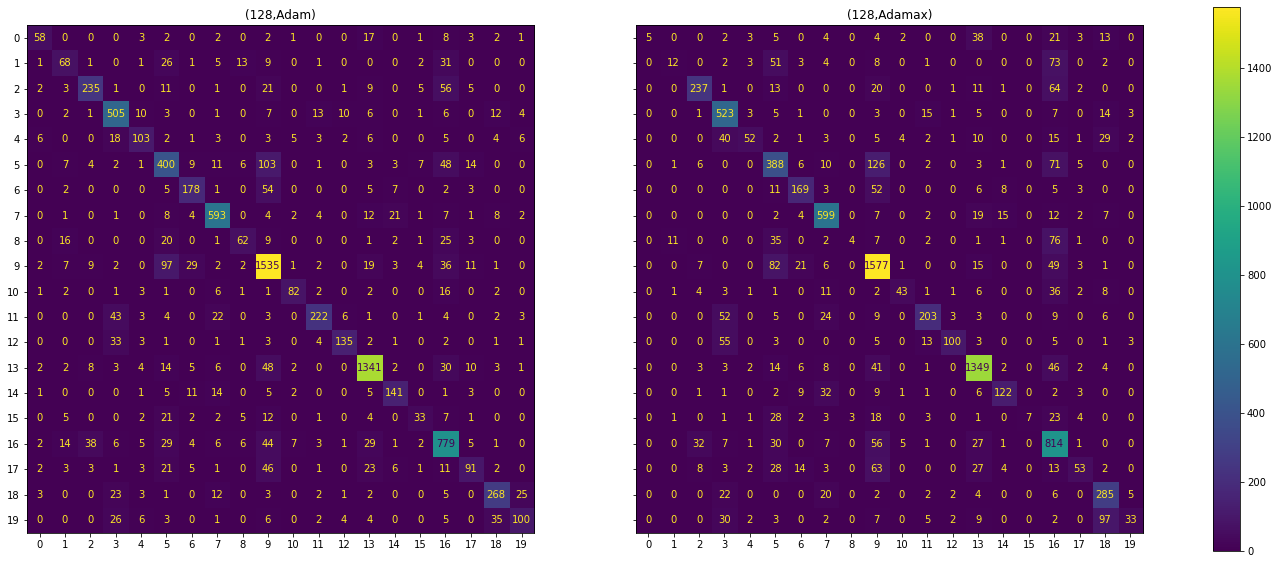

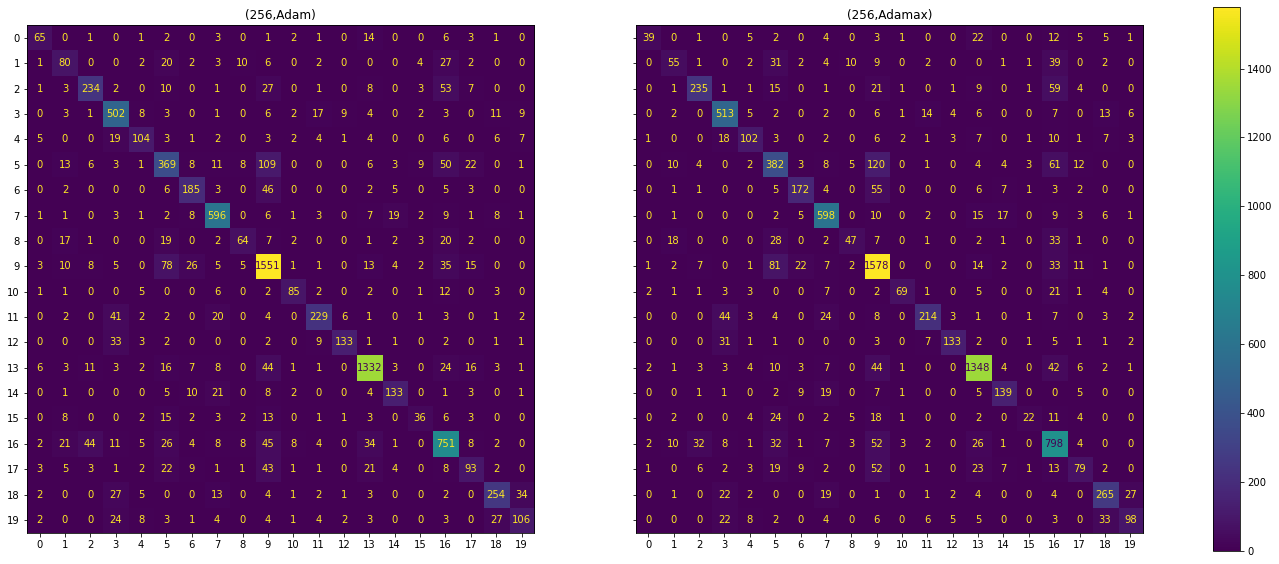

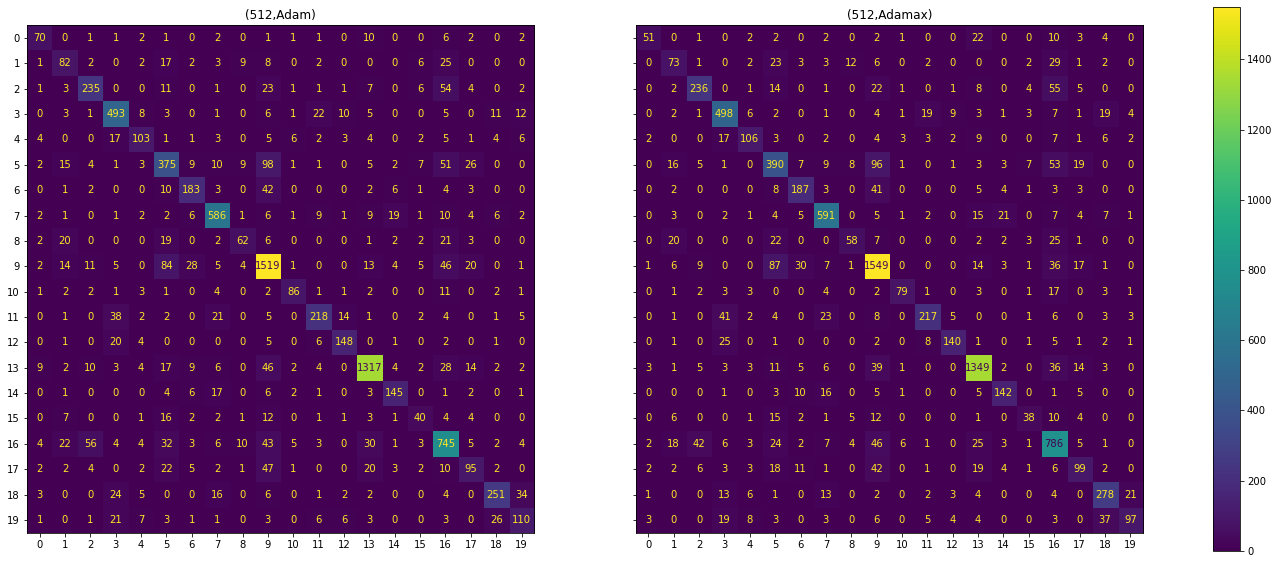

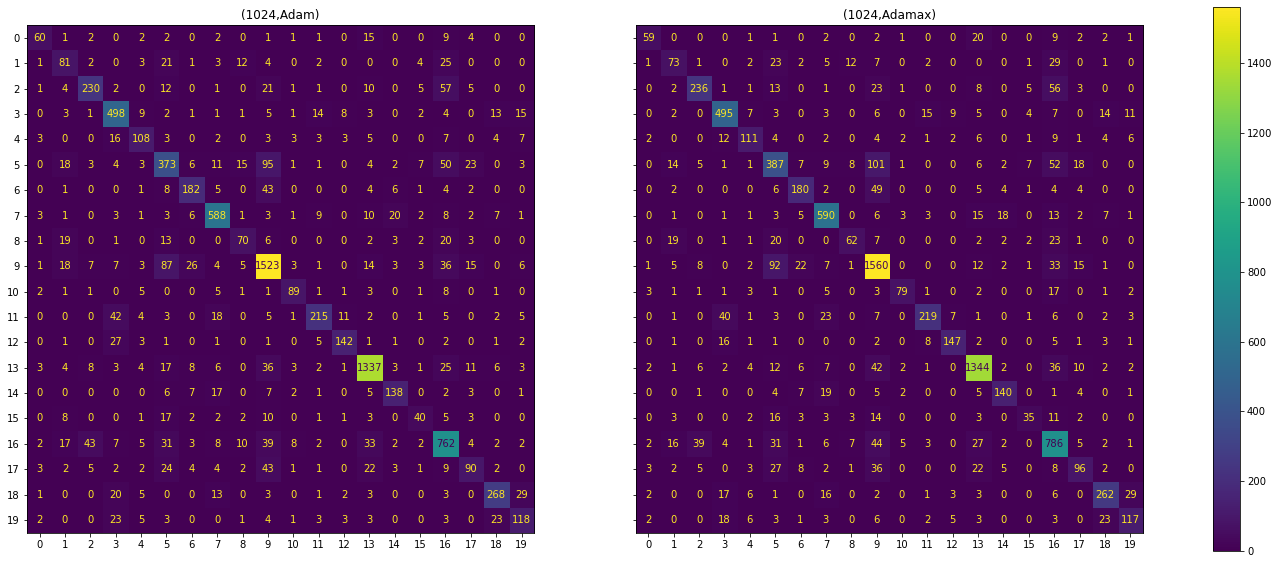

Best configuration conbination(Units, Optimizer): (1024,Adamax)
With Accuracy: 78.11


In [10]:
best_accuracy=0.0
best_unit=0
best_optimizer=''

for i in range(len(predicts)):
    y_predict =  predicts[i].argmax(axis=-1)
    if accuracy_score(y_test, y_predict)*100 > best_accuracy:
        best_accuracy = accuracy_score(y_test, y_predict)*100
        best_unit = units[i]
        best_optimizer = optimizers[i]
    print(f'(Units, Optimizer): ({units[i]},{optimizers[i]})')
    print(f'Accuracy: {round(accuracy_score(y_test, y_predict)*100,2)}%')
    print(f'Recall: {np.round(recall_score(y_test, y_predict, average=None)*100,2)}%')
    print(f'Precision: {np.round(ps(y_test, y_predict, average=None)*100,2)}%')
    print()

for i in range(0,len(predicts),2):
    f, axes = plt.subplots(1, 2, figsize=(25, 10), sharey='row')
    for j in range(2):
        disp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=predicts[i+j].argmax(axis=-1)))
        disp.plot(ax=axes[j])
        disp.ax_.set_title(f'({units[i+j]},{optimizers[i+j]})')
        disp.im_.colorbar.remove()
        disp.ax_.set_xlabel('')
        disp.ax_.set_ylabel('')
    f.colorbar(disp.im_, ax=axes)
    plt.show()

print(f'Best configuration conbination(Units, Optimizer): ({best_unit},{best_optimizer})\nWith Accuracy: {round(best_accuracy,2)}')

## 7. Comparison & Conclusion

* Number of units of hidden layer
    * 隱藏層神經元數量越多的表現會越好，不過training花費的時間也會因為模型更複雜而越久
* Optimizer
    * 普遍來看Adamax的表現會比Adam還要好
* 照上面的validation performance來看，看起來我的作法還算不錯，不過在training的時間會花比較久一點
    * 曾經有想過要先對training data做PCA，讓資料維度可以降低一點、訓練時間可以大幅縮短，不過PCA的時間花費更多，我甚至出門吃個午餐回家經過一個小時還沒跑完。
* 我的前處理跟丟進model的作法應該算是最直觀的方法，不知道有沒有方法一樣可以解這個題目呢?
* 神經網路感覺比前幾次作業還要難懂一點，但還算不錯玩，之後應該會試試看用其他資料來跑跑看，還有其他技術像是怎麼加速或是用GPU去跑之類的。

## 8. Kaggle Submission
### Read testing dataset from file
* Use read_json() in Pandas to read the testing dataset from file.
* Generate a new pd Dataframe to store the ingredients used for each cuisine in one-hot encoding form.

In [11]:
testing_set = pd.read_json('test.json')
testing = pd.DataFrame(0, index=range(len(testing_set)), columns=ingredients.keys())
for i in range(len(testing_set)):
    for key in testing_set['ingredients'][i]:
        if key in ingredients:
            testing.at[i, key] = 1
testing

,salt,olive oil,onions,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,...,mini pepperoni slices,low-fat canned coconut milk,Bartlett Pear,meat fats,brown rice penne,belacan,digestive biscuit,carnation condensed milk,legumes,Classico Pasta Sauce
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Retrain one of your best models with the whole train.json, predict test.json
* Use keras.utils.to_categorical() in tensorflow to encode the label as one-hot encoding form to meet the requirement of model.
* Use model_buliding() defined above to build the model and train it with whole training data.
* Use labelencoder.inverse_transform() in scikit-learn to get the original label from encoded one.

In [12]:
y_training = tf.keras.utils.to_categorical(Y, num_classes=20)

model=model_building(best_unit, best_optimizer)
model.fit(X, y_training, epochs=20, batch_size=512, verbose=0)
testing_predict = model.predict(testing.values.astype(float))
testing_predict = labelencoder.inverse_transform(testing_predict.argmax(axis=-1))

### Generate CSV file
* Generate new pd Dataframe to store the id's and predict result of testing dataset.
* use to_csv() in Pandas to output the Dataframe as CSV file.

In [13]:
output = pd.DataFrame({'id' : testing_set['id'], 'Category' : testing_predict})
output.to_csv("output.csv", header=True, index=False)
output

,id,Category
0,14,italian
1,22,mexican
2,24,southern_us
3,37,mexican
4,40,british
...,...,...
9995,49692,southern_us
9996,49693,southern_us
9997,49697,italian
9998,49709,french


### Take a screenshot of the Leaderboard, highlight your name, and put it in the report.
#### Team name: ywliu722
* Use imshow() and imread() in matplotlib to read the screenshot of the leaderboard on Kaggle.

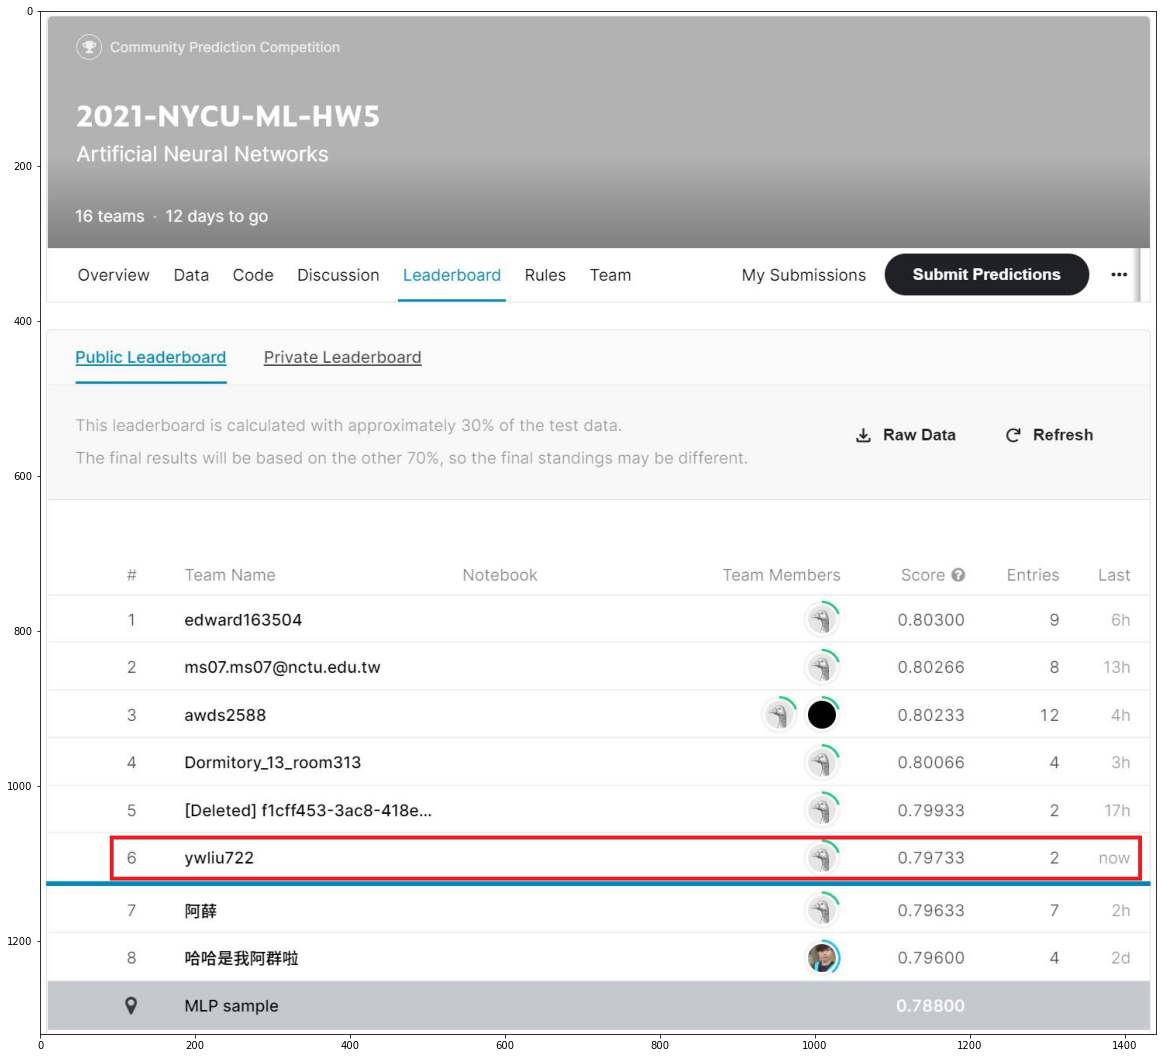

In [17]:
plt.figure(figsize=(20, 20))
plt.imshow(plt.imread('kaggle.jpg'))